In [1]:
# DJIA Stock Datasets
import pandas as pd
df = pd.read_csv('upload_DJIA_table_1.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close,yesterday_adj_close
0,2008/8/8,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,NaN
1,2008/8/11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,11734.32031
2,2008/8/12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,11782.34961
3,2008/8/13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,11642.46973
4,2008/8/14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,11532.95996
...,...,...,...,...,...,...,...,...
1984,2016/6/27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023,17400.75000
1985,2016/6/28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070,17140.24023
1986,2016/6/29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969,17409.72070
1987,2016/6/30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023,17694.67969


In [2]:
def function(a, b):
    if a >= b:
        return 1
    else:
        return 0

In [3]:
df['Class'] = df.apply(lambda x : function(x['Adj Close'],x['yesterday_adj_close']),axis = 1)
df

,Date,Open,High,Low,Close,Volume,Adj Close,yesterday_adj_close,Class
0,2008/8/8,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,NaN,0
1,2008/8/11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,11734.32031,1
2,2008/8/12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,11782.34961,0
3,2008/8/13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,11642.46973,0
4,2008/8/14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,11532.95996,1
...,...,...,...,...,...,...,...,...,...
1984,2016/6/27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023,17400.75000,0
1985,2016/6/28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070,17140.24023,1
1986,2016/6/29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969,17409.72070,1
1987,2016/6/30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023,17694.67969,1


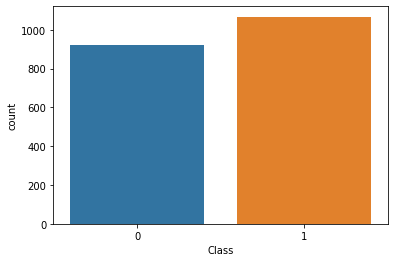

In [4]:
import seaborn as sns
sns.countplot(x='Class', data =df )

In [5]:
df_combined = pd.read_csv("Combined_News_DJIA.csv")
df_combined

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [6]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

In [7]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))
punctuation = ["'", ":", "b'", ".", "\"", "]", "[", ".'", ".\"", "?"]

stemmer = SnowballStemmer("english")
for p in punctuation:
    stop_words.add(p)
tokenizer = WordPunctTokenizer()

In [9]:
def custom_tokenize(text):
    tokens = tokenizer.tokenize(str(text))
    # filtered_tokens = [stemmer.stem(t.lower()) for t in tokens if not t in stop_words and len(t) > 1]
    filtered_tokens = [t.lower() for t in tokens if not t in stop_words and len(t) > 1]
    return " ".join(filtered_tokens)
    

In [10]:
print(custom_tokenize("let's go to mall!! Watch Jim's match"))

let go mall !! watch jim match


In [11]:
cols= df_combined.columns
for col in cols:
    if "Top" in col:
        df_combined[str(col)+"_"]=df_combined[col].apply(custom_tokenize)
        df_combined.drop([col], axis=1, inplace=True)

In [12]:
df_combined.head()

,Date,Label,Top1_,Top2_,Top3_,Top4_,Top5_,Top6_,Top7_,Top8_,Top9_,Top10_,Top11_,Top12_,Top13_,Top14_,Top15_,Top16_,Top17_,Top18_,Top19_,Top20_,Top21_,Top22_,Top23_,Top24_,Top25_
0,2008-08-08,0,georgia downs two russian warplanes countries ...,breaking musharraf impeached,russia today columns troops roll south ossetia...,russian tanks moving towards capital south oss...,"afghan children raped impunity ,' official say...",150 russian tanks entered south ossetia whilst...,breaking georgia invades south ossetia russia ...,the enemy combatent trials nothing sham salim ...,georgian troops retreat osettain capital presu...,did prep georgia war russia ?',rice gives green light israel attack iran says...,announcing class action lawsuit behalf america...,so --- russia georgia war nyt top story openin...,china tells bush stay countries affairs,did world war iii start today ?',georgia invades south ossetia russia gets invo...,al qaeda faces islamist backlash,condoleezza rice the us would act prevent isra...,this busy day the european union approved new ...,georgia withdraw 000 soldiers iraq help fight ...,why pentagon thinks attacking iran bad idea us...,caucasus crisis georgia invades south ossetia,"indian shoe manufactory and series like work ?""'",visitors suffering mental illnesses banned oly...,no help mexico kidnapping surge
1,2008-08-11,1,why wont america nato help us if wont help us ...,bush puts foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russians advance ...,"olympic opening ceremony fireworks faked '""",what mossad fraudulent new zealand passports i...,russia angered israeli military sale georgia,an american citizen living ossetia blames geor...,welcome to world war iv now in high definition !',georgia move mistake monumental proportions,russia presses deeper georgia says regime chan...,abhinav bindra wins first ever individual olym...,ship heads arctic define territory,drivers jerusalem taxi station threaten quit r...,the french team stunned phelps 4x100m relay team,israel us behind georgian aggression ?',"'"" do believe tv neither russian georgian ther...",riots still going montreal canada police murde...,china overtake us largest manufacturer,war south ossetia pics ]',israeli physicians group condemns state torture,russia beaten united states head peak oil,perhaps question georgia russia conflict,russia much better war,so come trading sex food
2,2008-08-12,0,remember adorable year old sang opening ceremo...,"russia ends georgia operation '""","'"" if sexual harassment would children ...""'",al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,why microsoft intel tried kill xo 100 laptop,stratfor the russo georgian war balance power,trying get sense this whole georgia russia war...,the us military surprised timing swiftness rus...,beats war drum iran dumps dollar,gorbachev georgian military attacked south oss...,cnn use footage tskhinvali ruins cover georgia...,beginning war olympics opening violates ancien...,55 pyramids large luxor stacked mega city pyra...,the 11 top party cities world,troops still georgia know georgia first place ?)',why russias response georgia right,gorbachev accuses making serious blunder pursu...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia the israeli connection,all signs point us encouraging georgia invade ...,christopher king argues us nato behind georgia...,america the new mexico ?',"bbc news asia pacific extinction man climate '"""
3,2008-08-13,0,refuses israel weapons attack iran report,when president ordered attack tskhinvali capit...,israel clears troops killed reuters cameraman,"britain \' policy tough drugs pointless "", say...",body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivors prefab ...,bush announces operation get all up in russia ...,russian forces sink georgian ships,the commander navy air reconnaissance

In [13]:
all_headlines = []
for row in range(0,len(df_combined.index)):
    all_headlines.append(' '.join(str(x) for x in df_combined.iloc[row,2:27]))

In [14]:
all_headlines[0:4]

['georgia downs two russian warplanes countries move brink war breaking musharraf impeached russia today columns troops roll south ossetia footage fighting youtube )\' russian tanks moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan children raped impunity ,\' official says sick three year old raped nothing 150 russian tanks entered south ossetia whilst georgia shoots two russian jets breaking georgia invades south ossetia russia warned would intervene so side the enemy combatent trials nothing sham salim haman sentenced years kept longer anyway feel like georgian troops retreat osettain capital presumably leaving several hundred people killed video ]\' did prep georgia war russia ?\' rice gives green light israel attack iran says veto israeli military ops announcing class action lawsuit behalf american public against fbi so --- russia georgia war nyt top story opening ceremonies olympics what fucking disgrace yet proof decline journalis

In [15]:
len(df_combined),len(all_headlines)

(1989, 1989)

In [16]:
df_combined["combined"]=all_headlines
df_combined

,Date,Label,Top1_,Top2_,Top3_,Top4_,Top5_,Top6_,Top7_,Top8_,Top9_,Top10_,Top11_,Top12_,Top13_,Top14_,Top15_,Top16_,Top17_,Top18_,Top19_,Top20_,Top21_,Top22_,Top23_,Top24_,Top25_,combined
0,2008-08-08,0,georgia downs two russian warplanes countries ...,breaking musharraf impeached,russia today columns troops roll south ossetia...,russian tanks moving towards capital south oss...,"afghan children raped impunity ,' official say...",150 russian tanks entered south ossetia whilst...,breaking georgia invades south ossetia russia ...,the enemy combatent trials nothing sham salim ...,georgian troops retreat osettain capital presu...,did prep georgia war russia ?',rice gives green light israel attack iran says...,announcing class action lawsuit behalf america...,so --- russia georgia war nyt top story openin...,china tells bush stay countries affairs,did world war iii start today ?',georgia invades south ossetia russia gets invo...,al qaeda faces islamist backlash,condoleezza rice the us would act prevent isra...,this busy day the european union approved new ...,georgia withdraw 000 soldiers iraq help fight ...,why pentagon thinks attacking iran bad idea us...,caucasus crisis georgia invades south ossetia,"indian shoe manufactory and series like work ?""'",visitors suffering mental illnesses banned oly...,no help mexico kidnapping surge,georgia downs two russian warplanes countries ...
1,2008-08-11,1,why wont america nato help us if wont help us ...,bush puts foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russians advance ...,"olympic opening ceremony fireworks faked '""",what mossad fraudulent new zealand passports i...,russia angered israeli military sale georgia,an american citizen living ossetia blames geor...,welcome to world war iv now in high definition !',georgia move mistake monumental proportions,russia presses deeper georgia says regime chan...,abhinav bindra wins first ever individual olym...,ship heads arctic define territory,drivers jerusalem taxi station threaten quit r...,the french team stunned phelps 4x100m relay team,israel us behind georgian aggression ?',"'"" do believe tv neither russian georgian ther...",riots still going montreal canada police murde...,china overtake us largest manufacturer,war south ossetia pics ]',israeli physicians group condemns state torture,russia beaten united states head peak oil,perhaps question georgia russia conflict,russia much better war,so come trading sex food,why wont america nato help us if wont help us ...
2,2008-08-12,0,remember adorable year old sang opening ceremo...,"russia ends georgia operation '""","'"" if sexual harassment would children ...""'",al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,why microsoft intel tried kill xo 100 laptop,stratfor the russo georgian war balance power,trying get sense this whole georgia russia war...,the us military surprised timing swiftness rus...,beats war drum iran dumps dollar,gorbachev georgian military attacked south oss...,cnn use footage tskhinvali ruins cover georgia...,beginning war olympics opening violates ancien...,55 pyramids large luxor stacked mega city pyra...,the 11 top party cities world,troops still georgia know georgia first place ?)',why russias response georgia right,gorbachev accuses making serious blunder pursu...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia the israeli connection,all signs point us encouraging georgia invade ...,christopher king argues us nato behind georgia...,america the new mexico ?',"bbc news asia pacific extinction man climate '""",remember adorable year old sang opening ceremo...
3,2008-08-13,0,refuses israel weapons attack iran report,when president ordered attack tskhinvali capit...,israel clears troops killed reuters cameraman,"britain \' policy tough drugs pointless "", say...",body 14 year old found trunk latest ransom pai...,china moved 1

Let's apply TFIDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

In [27]:
train=df_combined[0:int(len(df_combined)*.80)]
test=df_combined[int(len(df_combined)*.80):]

In [28]:
train_x, test_x, y_train, y_test=train["combined"], test["combined"], train["Label"], test["Label"]
print(test_x.shape, y_test.shape)

(398,) (398,)


In [29]:
tfvectorizer= TfidfVectorizer(max_features = 50000, ngram_range=(2,3))
X_train=tfvectorizer.fit_transform(train_x)
X_test=tfvectorizer.transform(test_x)

In [30]:
print(tfvectorizer.get_feature_names())
print(X_train.shape)

['00 gmt', '000 000', '000 000 000', '000 000 tons', '000 acres', '000 american', '000 ancient', '000 bail', '000 bodies', '000 bottles', '000 canadian', '000 children', '000 chinese', '000 chinese children', '000 chinese workers', '000 christians', '000 citizens', '000 civilians', '000 damages', '000 dead', '000 dead pigs', '000 deaths', '000 elephants', '000 employees', '000 euro', '000 euros', '000 every', '000 feet', '000 fine', '000 flee', '000 foreign', '000 gallons', '000 hectares', '000 homeless', '000 homes', '000 houses', '000 india', '000 infected', '000 innocent', '000 internet', '000 iraqis', '000 ireland', '000 irish', '000 jews', '000 jobs', '000 jobs cut', '000 jobs uk', '000 killed', '000 kilometers', '000 kurds', '000 lashes', '000 lbs', '000 legal', '000 litres', '000 lives', '000 man', '000 march', '000 may', '000 members', '000 men', '000 metric', '000 metric tons', '000 migrant', '000 migrant workers', '000 migrants', '000 migrants die', '000 miles', '000 miles aw

Lets apply classifier

In [31]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [32]:
print(y_test.shape, X_test.shape)

(398,) (398, 50000)


In [33]:
def all_classifier():
    clf = LogisticRegressionCV(Cs=[0.1,1.0,10.0], cv=5, solver='liblinear').fit(X_train, y_train)
    print("Logistic Classifier", clf.score(X_test, y_test))
    y_preds=clf.predict_proba(X_test)
    y_preds = y_preds[:, 1]
    print("Logistic ROC Curve", roc_auc_score(y_test, y_preds))
    
    rclf = RandomForestClassifier(max_depth=10)
    rclf.fit(X_train, y_train)
    print("RandomForest Classifier",rclf.score(X_test, y_test))
    
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    print("MultinomialNB Classifier", mnb.score(X_test, y_test))
    
    boost = XGBClassifier()
    boost.fit(X_train, y_train)
    y_pred = boost.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("XGBClassifier Accuracy: %.2f%%" % (accuracy * 100.0))

    return clf, rclf, mnb, boost

In [34]:
def model_words(model_obj, vectorizer):
    coeffs_list = model_obj.coef_.tolist()[0]
    features = vectorizer.get_feature_names()
    print(len(features), len(coeffs_list))

    
    coeff_df = pd.DataFrame({'Words' : features, 
                        'Coefficient' : coeffs_list})
    coeff_df = coeff_df.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
    print("Positive", coeff_df.head(10))
    print("Negative", coeff_df.tail(10))


In [35]:
a,b,c,d = all_classifier()

Logistic Classifier 0.507537688442211
Logistic ROC Curve 0.5506668013740149
RandomForest Classifier 0.5025125628140703
MultinomialNB Classifier 0.507537688442211
XGBClassifier Accuracy: 50.00%


In [ ]:
model_words(a, tfvectorizer)

50000 50000
Positive                        Words  Coefficient
29143            new zealand     0.063290
15216             first time     0.063036
42435               tear gas     0.054554
22085          islamic state     0.053448
39855           social media     0.053029
21122  intelligence agencies     0.051963
39044        sexual violence     0.051112
38336       security council     0.050514
1958           air pollution     0.049268
29542      nobel peace prize     0.049127
Negative                   Words  Coefficient
18800  haiti earthquake    -0.049158
47581       wall street    -0.050373
40176      south korean    -0.051054
21603      iran nuclear    -0.052222
39021      sexual abuse    -0.052383
32720     phone hacking    -0.053675
30067   nuclear weapons    -0.058092
3474       around world    -0.064438
5571          bin laden    -0.065974
139              10 000    -0.066501


LSTM Model


In [36]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [37]:
t=Tokenizer()
t.fit_on_texts(df_combined["combined"])
max_length = max([len(d.split(" ")) for d in df_combined["combined"]])
max_length

491

In [38]:
print(t.document_count)
print(len(t.word_index))

1989
34699


In [39]:
doc_encoded=t.texts_to_sequences(df_combined['combined'].values)
print(doc_encoded[0])

[880, 10576, 30, 27, 2640, 134, 476, 2135, 15, 1290, 8915, 15897, 12, 229, 15898, 144, 4735, 43, 2961, 997, 559, 1471, 2, 27, 1273, 1821, 1225, 403, 43, 2961, 881, 2034, 964, 2962, 2690, 140, 191, 66, 592, 6853, 2, 149, 4, 2691, 92, 14, 49, 592, 1100, 1416, 27, 1273, 2210, 43, 2961, 9629, 880, 3716, 30, 27, 1070, 1290, 880, 8916, 43, 2961, 12, 620, 61, 4180, 1239, 1274, 1, 2548, 20477, 2859, 1100, 7284, 15899, 20478, 413, 16, 1739, 573, 6227, 1646, 114, 2962, 144, 5701, 20479, 403, 13451, 1061, 750, 3268, 11, 22, 131, 2, 2211, 15900, 880, 15, 12, 2, 3084, 867, 885, 1116, 7, 46, 20, 4, 4878, 23, 32, 6228, 6229, 1145, 441, 1647, 3717, 126, 116, 777, 1396, 1239, 12, 880, 15, 5702, 127, 569, 2175, 9630, 954, 419, 4427, 9631, 955, 2283, 2136, 3718, 8, 455, 818, 1136, 134, 2749, 2211, 6, 15, 4576, 745, 229, 2, 880, 8916, 43, 2961, 12, 378, 1117, 245, 11846, 880, 8285, 484, 1275, 15, 2, 87, 678, 520, 868, 3269, 11847, 3084, 1, 3, 61, 650, 852, 23, 192, 20, 23, 560, 33, 6524, 8286, 7, 1931, 15

In [40]:
print(t.word_index["world"])

6


In [41]:
doc_encoded=pad_sequences(doc_encoded, maxlen=400)
print(doc_encoded[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   880 10576    30    27  2640   134   476  2135
    15  1290  8915 15897    12   229 15898   144  4735    43  2961   997
   559  1471     2    27  1273  1821  1225   403   

In [ ]:
vocab_size=len(t.word_index)+1
EMB_OUTPUT_DIMS = 100

In [ ]:
e = Embedding(input_dim=vocab_size, output_dim=EMB_OUTPUT_DIMS, input_length=400)

In [ ]:
model=Sequential()
model.add(e)
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_len = int(len(doc_encoded)*0.8)

In [ ]:
X_train, y_train, X_test, y_test = doc_encoded[0:train_len], df_combined[0:train_len]["Label"], doc_encoded[train_len:], df_combined[train_len:]["Label"]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1591, 400) (1591,) (398, 400) (398,)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 100)          3470000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 3,487,057
Trainable params: 3,487,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=20,validation_split =0.2)

Epoch 1/20
80/80 [==============================] - 6s 77ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2/20
80/80 [==============================] - 6s 77ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 3/20
80/80 [==============================] - 6s 77ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 4/20
80/80 [==============================] - 6s 77ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/20
80/80 [==============================] - 6s 78ms/step - loss: 8.9099e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 6/20
80/80 [==============================] - 6s 77ms/step - loss: 9.1244e-04 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/20
80/80 [==============================] - 6s 77ms/step - loss: 3.3690e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
E

In [ ]:
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

13/13 [==============================] - 0s 25ms/step - loss: 2.0931 - accuracy: 0.5201
test loss, test acc: [2.093090534210205, 0.520100474357605]


CNN Model

In [ ]:
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model

main_input = Input(shape=(400,), dtype='int32', name='main_input')
embed_1 = Embedding(input_dim = vocab_size, \
                    output_dim = EMB_OUTPUT_DIMS, \
                    input_length = 400,\
                    name='embedding')(main_input)

conv1d_1= Conv1D(filters=64, kernel_size=1, \
                 name='conv_unigram',\
                 activation='relu')(embed_1)

pool_1 = MaxPooling1D(400-1+1, \
                      name='pool_unigram')(conv1d_1)

flat_1 = Flatten(name='flat_unigram')(pool_1)

conv1d_2= Conv1D(filters=64, kernel_size=2, \
                 name='conv_bigram',\
                 activation='relu')(embed_1)
pool_2 = MaxPooling1D(400-2+1, name='pool_bigram')(conv1d_2)
flat_2 = Flatten(name='flat_bigram')(pool_2)

conv1d_3= Conv1D(filters=64, kernel_size=3, \
                 name='conv_trigram',activation='relu')(embed_1)
pool_3 = MaxPooling1D(400-3+1, name='pool_trigram')(conv1d_3)
flat_3 = Flatten(name='flat_trigram')(pool_3)

z=Concatenate(name='concate')([flat_1, flat_2, flat_3])

drop_1=Dropout(rate=0.5, name='dropout')(z)

preds = Dense(1, activation='sigmoid', name='output')(drop_1)

model_2 = Model(inputs=main_input, outputs=preds)

model_2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 100)     3470000     main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 400, 64)      6464        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Conv1D)            (None, 399, 64)      12864       embedding[0][0]                  
_______________________________________________________________________________________

In [ ]:
model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model_2.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split =0.2)

Epoch 1/20
40/40 [==============================] - 5s 123ms/step - loss: 0.6156 - accuracy: 0.7547 - val_loss: 0.6860 - val_accuracy: 0.5674
Epoch 2/20
40/40 [==============================] - 5s 122ms/step - loss: 0.5602 - accuracy: 0.8373 - val_loss: 0.6901 - val_accuracy: 0.5643
Epoch 3/20
40/40 [==============================] - 5s 120ms/step - loss: 0.5096 - accuracy: 0.8899 - val_loss: 0.6914 - val_accuracy: 0.5392
Epoch 4/20
40/40 [==============================] - 5s 120ms/step - loss: 0.4450 - accuracy: 0.9277 - val_loss: 0.6911 - val_accuracy: 0.5392
Epoch 5/20
40/40 [==============================] - 5s 120ms/step - loss: 0.3851 - accuracy: 0.9481 - val_loss: 0.6937 - val_accuracy: 0.5266
Epoch 6/20
40/40 [==============================] - 5s 121ms/step - loss: 0.3074 - accuracy: 0.9717 - val_loss: 0.6992 - val_accuracy: 0.5266
Epoch 7/20
40/40 [==============================] - 5s 121ms/step - loss: 0.2405 - accuracy: 0.9796 - val_loss: 0.7010 - val_accuracy: 0.5204
Epoch 

In [ ]:
score = model_2.evaluate(X_test, y_test, batch_size=32,verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 24ms/step - loss: 0.9132 - accuracy: 0.5226
Test score: 0.9132059216499329
Test accuracy: 0.5226130485534668
